# K-Means Iris dataset

In [12]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import logging
from sklearn.preprocessing import LabelEncoder


In [13]:
RANDOM_SEED = 9
DATASPLIT = 0.3
DATASET_ID= 81

In [14]:
logger = logging.getLogger(str(DATASET_ID))
logging.basicConfig(level=logging.DEBUG)

In [15]:
dataset = fetch_ucirepo(id=DATASET_ID)

df = pd.DataFrame(dataset.data.features)
df['class'] = dataset.data.targets

df = df.replace("?", pd.NA).dropna()

label_encoder = LabelEncoder()

df['class_encoded'] = label_encoder.fit_transform(df['class'])

labels = df['class_encoded']


scaler = StandardScaler()

data = df.drop(columns=['class'])

data = scaler.fit_transform(data)




data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=DATASPLIT, random_state=RANDOM_SEED)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=DATASPLIT, random_state=RANDOM_SEED)

logger.info(f"Train dataset length: {len(data_train)}, Validation dataset length: {len(data_val)}, Test dataset length: {len(data_test)}")


print(label_encoder.classes_)
print(df.head())


INFO:81:Train dataset length: 5385, Validation dataset length: 2309, Test dataset length: 3298


[0 1 2 3 4 5 6 7 8 9]
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0          47         100          27          81          57          37   
1           0          89          27         100          42          75   
2           0          57          31          68          72          90   
3           0         100           7          92           5          68   
4           0          67          49          83         100         100   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0          26           0           0           23           56           53   
1          29          45          15           15           37            0   
2         100         100          76           75           50           51   
3          19          45          86           34          100           45   
4          81          80          60           60           40           40   

   Attribute13  Attribute14  Attri

In [16]:
parameters = {
    'n_clusters': range(2, 10, 1),
    'max_iter': range(100, 500, 100),
}


clf = GridSearchCV(KMeans(random_state=RANDOM_SEED), parameters, scoring='accuracy', verbose=0)
clf.fit(data_val, label_val)

model = clf.best_estimator_
logger.info("Best cross-validation score: %f", clf.best_score_)
logger.info("With parameters: %s", clf.best_params_)

logger.info("Training model with best parameters")
model.fit(data_train, label_train)

predictions = model.predict(data_test)
accuracy = accuracy_score(label_test, predictions)
logger.info("Accuracy: %f", accuracy)



ari = adjusted_rand_score(label_test, predictions)
logger.info(f"ARI score: {ari}")


INFO:81:Best cross-validation score: 0.128627
INFO:81:With parameters: {'max_iter': 100, 'n_clusters': 4}
INFO:81:Training model with best parameters
INFO:81:Accuracy: 0.072165
INFO:81:ARI score: 0.3064457394957907


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x76a93f98a120>


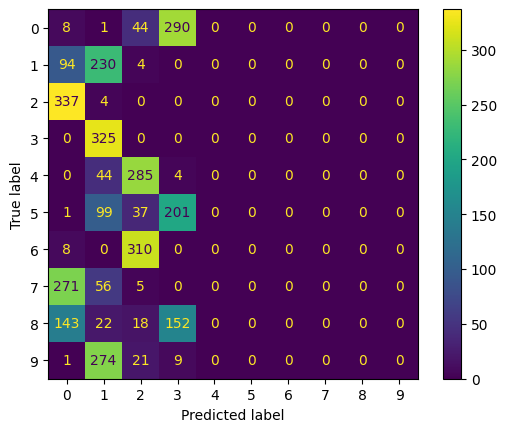

In [17]:
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()


In [18]:

plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['class_encoded'], cmap='rainbow')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Scatter plot of the dataset")
plt.show()

KeyError: 'class_encoded'

<Figure size 1000x700 with 0 Axes>